HW6
ALI BEHROUZI 4010724002 

# Convolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True

  )
training_set= train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/dataset/training_set',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(
      rescale=1./255)
test_set=test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/dataset/test_set',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn =tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
history=cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
250/250 [==============================] - 4160s 17s/step - loss: 0.6759 - accuracy: 0.5624 - val_loss: 0.5992 - val_accuracy: 0.6865
Epoch 2/30
250/250 [==============================] - 88s 350ms/step - loss: 0.6100 - accuracy: 0.6616 - val_loss: 0.5475 - val_accuracy: 0.7360
Epoch 3/30
250/250 [==============================] - 88s 350ms/step - loss: 0.5606 - accuracy: 0.7129 - val_loss: 0.5209 - val_accuracy: 0.7500
Epoch 4/30
250/250 [==============================] - 90s 360ms/step - loss: 0.5114 - accuracy: 0.7515 - val_loss: 0.4934 - val_accuracy: 0.7605
Epoch 5/30
250/250 [==============================] - 93s 372ms/step - loss: 0.4757 - accuracy: 0.7759 - val_loss: 0.5020 - val_accuracy: 0.7615
Epoch 6/30
250/250 [==============================] - 90s 361ms/step - loss: 0.4486 - accuracy: 0.7884 - val_loss: 0.4192 - val_accuracy: 0.8135
Epoch 7/30
250/250 [==============================] - 91s 365ms/step - loss: 0.4279 - accuracy: 0.7990 - val_loss: 0.4129 - val_ac

In [ ]:
import numpy as np

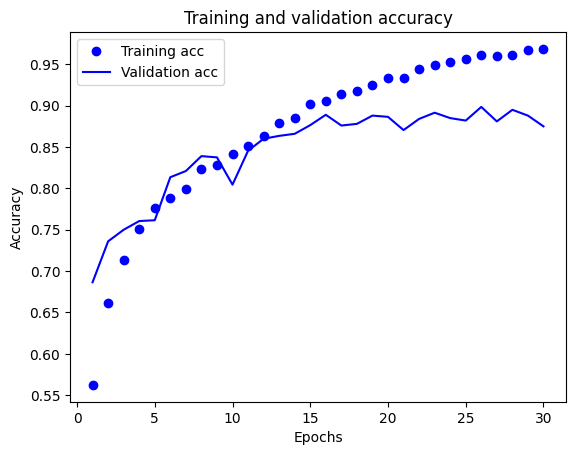

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

epochs = range(1, 30 + 1)

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Find the epoch with the best validation accuracy
best_epoch = np.argmax(val_acc_values)

# Print the training and validation accuracy for the best epoch
print(f"Best Epoch: {best_epoch + 1}")
print(f"Training Accuracy: {acc_values[best_epoch]}")
print(f"Validation Accuracy: {val_acc_values[best_epoch]}")

Best Epoch: 26
Training Accuracy: 0.9607499837875366
Validation Accuracy: 0.8985000252723694


## Part 4 - Making a single prediction

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/gdrive/My Drive/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (150, 150)) # this is a dog picture
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 279ms/step
dog
